In [10]:
import fiona
from rasterstats import zonal_stats
import matplotlib.pyplot as plt

In [12]:
with fiona.open('D:\\A1_JM\\areas\\manacapuru.shp') as src:
    zs = zonal_stats(src, 'D:\\S3\\s3jm\\S3B_OL_1_EFR____20200219T133638_20200219T133938_20200220T164913_0179_035_352_3060_LN1_O_NT_002_processed.tif',
                stats="count",
                raster_out=True,
                band=14)

C:\Users\david\.conda\envs\git-prj\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [13]:
zs

[{'count': 3018,
  'mini_raster_array': masked_array(
    data=[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
    mask=[[ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          ...,
          [ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True]],
    fill_value=1e+20,
    dtype=float32),
  'mini_raster_affine': Affine(0.002888242611433055, 0.0, -61.30751929140992,
         0.0, -0.002888242611433055, -3.3054980803041083),
  'mini_raster_nodata': -999}]

In [14]:
mskdt = zs[0]['mini_raster_array']

In [15]:
type(mskdt)

numpy.ma.core.MaskedArray

In [16]:
dt = mskdt.data

In [17]:
dt

array([[0.4818967 , 0.48186648, 0.4596436 , ..., 0.5881501 , 0.58811516,
        0.56644756],
       [0.48005185, 0.48002172, 0.45429534, ..., 0.34889582, 0.34841353,
        0.52737623],
       [0.48038167, 0.46185797, 0.45926327, ..., 0.14971477, 0.14924395,
        0.03092123],
       ...,
       [0.38733488, 0.42296425, 0.44884223, ..., 0.72400296, 0.7239703 ,
        0.7023622 ],
       [0.39785612, 0.39783698, 0.4649562 , ..., 0.707847  , 0.7078152 ,
        0.66397214],
       [0.4319058 , 0.43188438, 0.4702241 , ..., 0.71964127, 0.6593161 ,
        0.6524732 ]], dtype=float32)

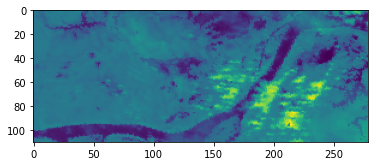

In [19]:
plt.imshow(dt)

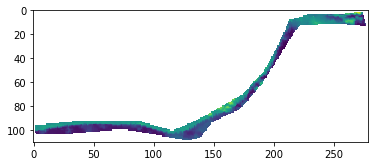

In [20]:
plt.imshow(mskdt)

In [33]:
stripe = mskdt.compressed()
stripe


array([0.8694255 , 0.9512648 , 0.98999506, ..., 0.2722187 , 0.2699241 ,
       0.27989843], dtype=float32)

In [51]:
# test_raster = 'D:\\S3\\s3jm\\S3B_OL_1_EFR____20200219T133638_20200219T133938_20200220T164913_0179_035_352_3060_LN1_O_NT_002_processed.tif'

test_raster = 'F:\\S3\\L1_EFR_iCOR\\S3A_OL_1_EFR____20190708T133506_20190708T133806_20190709T171146_0179_046_352_3060_LN1_O_NT_002_processed.tif'

In [56]:
red = get_unmasked_s3tif_data(input_shp='D:\\A1_JM\\areas\\manacapuru.shp',
                           input_s3_raster=test_raster,
                           band_number=8)

In [57]:
nir = get_unmasked_s3tif_data(input_shp='D:\\A1_JM\\areas\\manacapuru.shp',
                           input_s3_raster=test_raster,
                           band_number=14)

(0.0, 0.05)

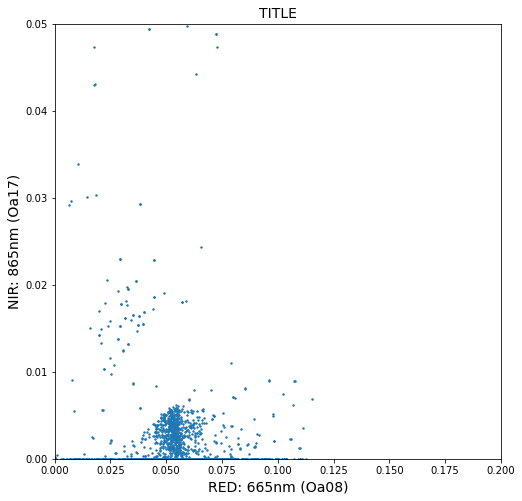

In [78]:
plt.title('TITLE', size=14)
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(red,nir,s=2)
plt.ylabel('NIR: 865nm (Oa17)', size=14)
plt.xlabel('RED: 665nm (Oa08)', size=14)
plt.xlim(0,0.2)
plt.ylim(0,0.05)

In [64]:
import os
work_dir = 'F:\\S3\\L1_EFR_iCOR'
files = os.listdir(work_dir)

In [68]:
icor_imgs = [os.path.join(work_dir,f) for f in files if f.endswith('.tif')]

In [73]:
os.path.basename(icor_imgs[0]).split('____')[1].split('_')[0]

'20181002T140841'

In [70]:
len(icor_imgs)

319

In [84]:
def get_unmasked_s3tif_data(input_shp, input_s3_raster, band_number):
#     import fiona
#     from rasterstats import zonal_stats
    with fiona.open(input_shp) as src:
        zs = zonal_stats(src, input_s3_raster,
                         stats="count",
                         raster_out=True,
                         band=band_number)
        
        mskdt = zs[0]['mini_raster_array']
        
        stripe = mskdt.compressed()
#         stripe = mskdt.data
        return stripe

In [88]:
def scatter_jm(img_title, red, nir, save_file, my_dpi=300):
    plt.title(img_title, size=14)
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.scatter(red,nir,s=2)
    plt.ylabel('NIR: 865nm (Oa17)', size=14)
    plt.xlabel('RED: 665nm (Oa08)', size=14)
    plt.xlim(0,0.2)
    plt.ylim(0,0.05)
    plt.savefig(save_file, dpi=my_dpi)
    plt.clf()

In [89]:
save_folder = 'D:\\processing\\win\\a1_plots\\mass_jm_scatter_icor\\MANACAPURU\\'

In [90]:
for img in icor_imgs:
    print(f'working on image: {img}')
    title = os.path.basename(img).split('____')[1].split('_')[0]
    
    print(f'extracting RED band.')
    red = get_unmasked_s3tif_data(input_shp='D:\\A1_JM\\areas\\manacapuru.shp',
                           input_s3_raster=img,
                           band_number=8)
    
    print(f'extracting NIR band.')
    nir = get_unmasked_s3tif_data(input_shp='D:\\A1_JM\\areas\\manacapuru.shp',
                           input_s3_raster=img,
                           band_number=14)
    
    print(f'saving plot over: {save_folder} {title}.png')
    scatter_jm(img_title=title,
              red=red,
              nir=nir,
              save_file=save_folder+title+'.png')

working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20181002T140841_20181002T141141_20181003T182144_0179_036_224_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20181002T140841.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20181003T134231_20181003T134531_20181004T174309_0179_036_238_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20181003T134231.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20181006T140457_20181006T140757_20181007T190525_0179_036_281_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20181006T140457.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20181007T133847_20181007T134147_20181008T182736_0179_036_295_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20181203T140110_20181203T140410_20181204T183334_0180_038_338_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20181203T140110.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20181207T135725_20181207T140025_20181208T172926_0179_039_010_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20181207T135725.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20181211T135340_20181211T135640_20181212T181122_0179_039_067_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20181211T135340.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20181212T132729_20181212T133029_20181213T173958_0179_039_081_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190204T132732_20190204T133032_20190205T180731_0180_041_081_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190204T132732.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190207T134959_20190207T135259_20190208T174702_0179_041_124_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190207T134959.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190208T132348_20190208T132648_20190209T171014_0179_041_138_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190208T132348.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190210T141225_20190210T141525_20190211T172923_0179_041_167_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190409T140844_20190409T141144_20190410T185429_0179_043_224_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190409T140844.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190410T134233_20190410T134533_20190411T181903_0179_043_238_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190410T134233.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190413T140500_20190413T140800_20190414T175016_0179_043_281_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190413T140500.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190414T133849_20190414T134149_20190415T170944_0180_043_295_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190606T140502_20190606T140802_20190607T183402_0179_045_281_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190606T140502.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190607T133851_20190607T134151_20190608T175056_0179_045_295_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190607T133851.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190610T140117_20190610T140417_20190611T173726_0179_045_338_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190610T140117.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190611T133506_20190611T133806_20190612T170004_0179_045_352_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190731T133849_20190731T134149_20190801T165008_0179_047_295_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190731T133849.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190803T140115_20190803T140415_20190804T181259_0179_047_338_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190803T140115.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190804T133504_20190804T133804_20190805T173159_0179_047_352_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190804T133504.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190807T135730_20190807T140030_20190808T171353_0179_048_010_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190926T140115_20190926T140415_20190927T171138_0179_049_338_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190926T140115.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190927T133504_20190927T133804_20190928T181010_0179_049_352_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190927T133504.png
working on image: F:\S3\L1_EFR_iCOR\S3A_OL_1_EFR____20190930T135731_20190930T140031_20191001T175133_0179_050_010_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190930T135731.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20181213T140246_20181213T140546_20181214T185214_0179_019_338_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190210T133254_20190210T133554_20190211T175007_0179_022_024_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190210T133254.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190214T132909_20190214T133209_20190215T164735_0179_022_081_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190214T132909.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190217T135136_20190217T135436_20190218T180617_0179_022_124_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190217T135136.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190220T141404_20190220T141704_20190221T175026_0179_022_167_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190415T141409_20190415T141709_20190416T183300_0179_024_167_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190415T141409.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190416T134758_20190416T135058_20190417T174932_0179_024_181_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190416T134758.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190419T141025_20190419T141325_20190420T173313_0179_024_224_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190419T141025.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190420T134414_20190420T134714_20190421T165858_0180_024_238_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190612T141017_20190612T141317_20190613T181208_0179_026_224_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190612T141017.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190613T134406_20190613T134706_20190614T173128_0179_026_238_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190613T134406.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190616T140632_20190616T140932_20190617T171135_0179_026_281_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190616T140632.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190617T134021_20190617T134321_20190618T181751_0179_026_295_3060_LN1_O_NT_002_processed.tif


working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190806T134409_20190806T134709_20190807T181241_0179_028_238_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190806T134409.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190809T140636_20190809T140936_20190810T175325_0179_028_281_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190809T140636.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190810T134025_20190810T134325_20190811T171548_0179_028_295_3060_LN1_O_NT_002_processed.tif
extracting RED band.
extracting NIR band.
saving plot over: D:\processing\win\a1_plots\mass_jm_scatter_icor\MANACAPURU\ 20190810T134025.png
working on image: F:\S3\L1_EFR_iCOR\S3B_OL_1_EFR____20190813T140251_20190813T140551_20190814T183552_0179_028_338_3060_LN1_O_NT_002_processed.tif


<Figure size 576x576 with 0 Axes>